In [3]:
!pip install --upgrade numpy pandas scipy statsmodels pmdarima --no-cache-dir


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_csv('weatherHistory 1.csv')

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [8]:
import pandas as pd

# Convert to datetime if not already
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Sort the DataFrame in ascending order by date
df = df.sort_values(by='Formatted Date', ascending=True).reset_index(drop=True)


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_9732\1355929485.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [9]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00+01:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-12-31 19:00:00+01:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
96449,2016-12-31 20:00:00+01:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
96450,2016-12-31 21:00:00+01:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
96451,2016-12-31 22:00:00+01:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [10]:
df.shape

(96453, 12)

In [11]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
X = df[['Formatted Date', 'Summary', 'Temperature (C)', 'Apparent Temperature (C)',
               'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
               'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']]
y = df['Precip Type']

In [15]:
from scipy.stats import shapiro

# List of numerical columns to test for normality
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                  'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                  'Visibility (km)', 'Pressure (millibars)']

all_normal = True  # Flag to track if all features follow normal distribution

for col in numerical_cols:
    data = X[col].dropna()  # Drop missing values
    
    stat, p = shapiro(data)
    print(f'Feature: {col}')
    print(f'Statistic={stat:.4f}, p-value={p:.4f}')
    
    if p > 0.05:
        print("Sample looks Gaussian (fail to reject H0)\n")
    else:
        print("Sample does not look Gaussian (reject H0)\n")
        all_normal = False  # Mark that at least one feature is not normal

if all_normal:
    print("✅ All tested numerical features appear to follow a normal distribution.")
else:
    print("⚠️ Not all tested numerical features follow a normal distribution.")


Feature: Temperature (C)
Statistic=0.9929, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Apparent Temperature (C)
Statistic=0.9885, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Humidity
Statistic=0.9281, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Wind Speed (km/h)
Statistic=0.9313, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Wind Bearing (degrees)
Statistic=0.9446, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Visibility (km)
Statistic=0.9201, p-value=0.0000
Sample does not look Gaussian (reject H0)

Feature: Pressure (millibars)
Statistic=0.1298, p-value=0.0000
Sample does not look Gaussian (reject H0)

⚠️ Not all tested numerical features follow a normal distribution.


In [17]:
X = X.fillna(X.mode())

In [18]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)  # Fill missing values with mode
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for inverse_transform if needed



In [19]:
df = df.drop(columns=['Formatted Date'])

In [20]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,0,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,111
1,17,0,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,111
2,17,0,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,111
3,18,0,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,111
4,17,0,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,111
...,...,...,...,...,...,...,...,...,...,...,...
96448,17,0,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,111
96449,17,0,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,111
96450,17,1,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,111
96451,17,1,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,111


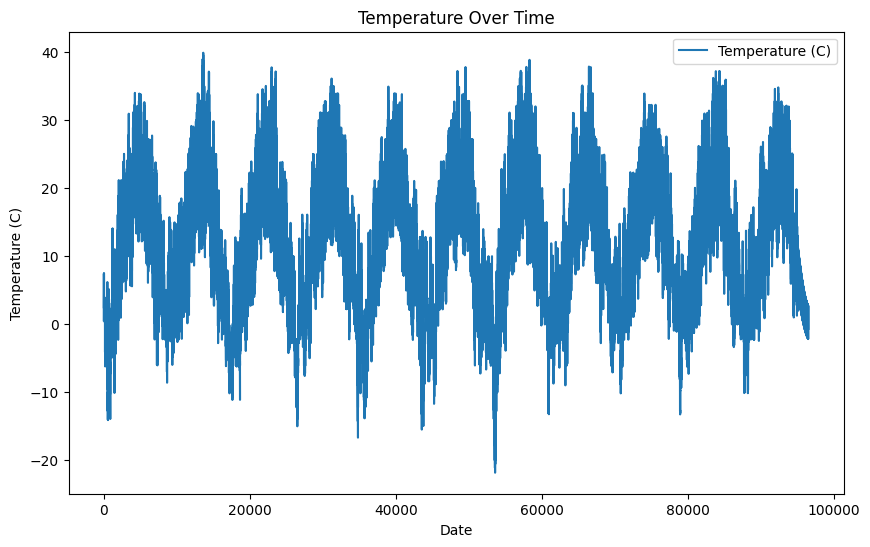

In [21]:
# Step 5: Visualize the data for understanding trend and seasonality
plt.figure(figsize=(10,6))
plt.plot(df['Temperature (C)'], label='Temperature (C)')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

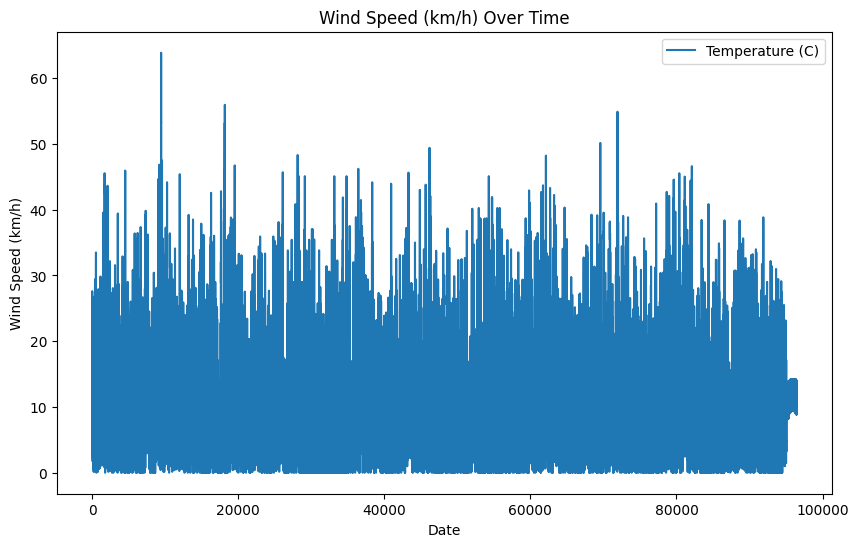

In [43]:
# Step 5: Visualize the data for understanding trend and seasonality
plt.figure(figsize=(10,6))
plt.plot(df['Wind Speed (km/h)'], label='Temperature (C)')
plt.title('Wind Speed (km/h) Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

In [14]:
# === Step 4: Check Stationarity with ADF Test ===
result = adfuller(df['Temperature (C)'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Non-stationary. Differencing will be applied.")
    df['Temp_diff'] = df['Temperature (C)'].diff().dropna()
else:
    df['Temp_diff'] = df['Temperature (C)']

ADF Statistic: -10.140083406906458
p-value: 8.465719841300948e-18


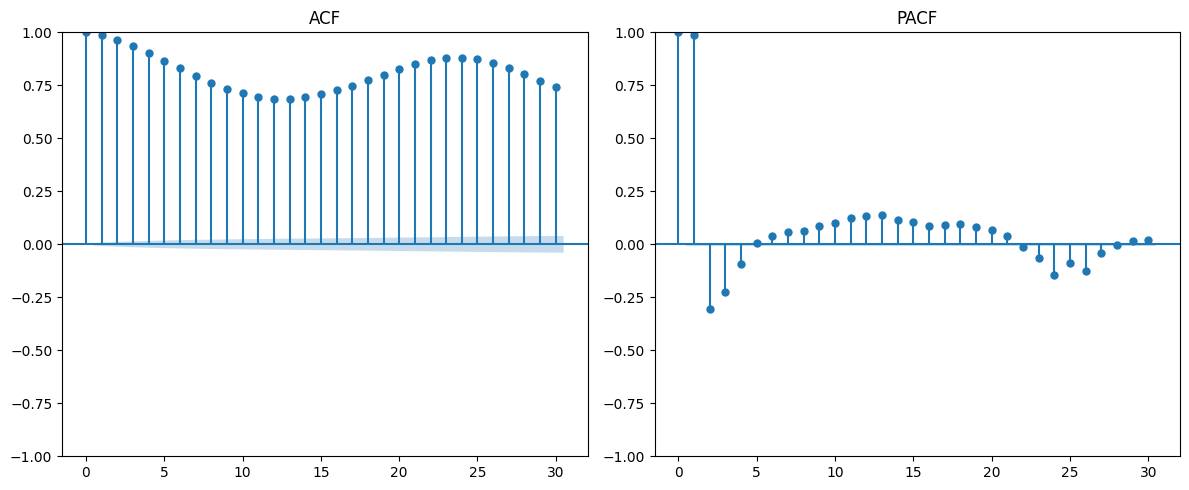

In [15]:
# === Step 5: Plot ACF and PACF to choose p and q ===
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(df['Temp_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF')
plt.subplot(122)
plot_pacf(df['Temp_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF')
plt.tight_layout()
plt.show()

In [16]:
# === Step 6: Split Data (80% train, 20% test) ===
ts = df['Temperature (C)'].dropna()
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [17]:
train_size

77162

In [18]:
# === Build ARIMA model with chosen order ===
p, d, q = 1, 1, 1  # manually selected
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

In [19]:
# === Step 8: Forecast ===
forecast = model_fit.forecast(steps=len(test))
y_test_pred = forecast
y_test = test

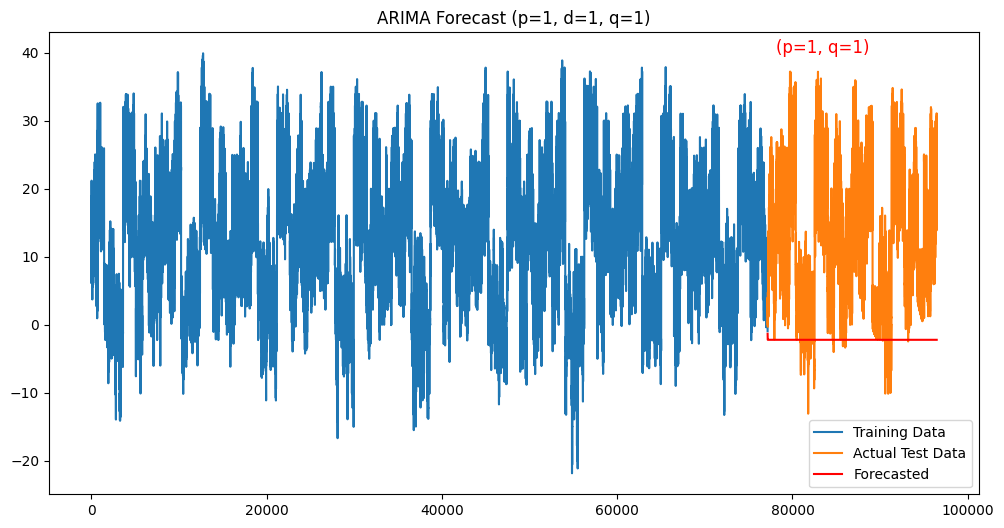

In [20]:
# === Plot Forecast vs Actual ===
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecasted', color='red')
plt.legend()
plt.title(f'ARIMA Forecast (p={p}, d={d}, q={q})')
plt.text(len(train) + len(test)*0.05, max(ts), f'(p={p}, q={q})', color='red', fontsize=12)
plt.show()

In [21]:
import numpy as np

def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) == 0:
        return np.nan  # Or return 0 or some indication of undefined
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100


In [22]:
# Step 11: Calculate evaluation metrics for training and testing data
# === Training Data (In-sample) ===
train_predictions = model_fit.predict(start=0, end=len(train)-1)

# Calculate MSE, RMSE, MAE, and MAPE for training
train_mse = mean_squared_error(train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(train, train_predictions)
train_mape = safe_mape(train, train_predictions)

# === Testing Data (Out-of-sample) ===
test_mse = mean_squared_error(test, forecast)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test, forecast)
test_mape = safe_mape(test, forecast)

# Step 12: Print results
print("\n=== Training Metrics ===")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MAPE: {train_mape:.4f}%")

print("\n=== Testing Metrics ===")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}%")



=== Training Metrics ===
Train MSE: 2.2910
Train RMSE: 1.5136
Train MAE: 0.9461
Train MAPE: 40.9468%

=== Testing Metrics ===
Test MSE: 291.2709
Test RMSE: 17.0667
Test MAE: 14.6407
Test MAPE: 226.0344%


In [34]:
from pmdarima import auto_arima
import numpy as np

# Sample data
data = np.array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
                 104, 118, 115, 126, 141, 135, 125, 149, 170, 170,
                 158, 133, 114, 140])

model = auto_arima(data, seasonal=False, trace=True)
print(model.summary())



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject